In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
import numpy as np
import seaborn as sns

# For PCA and tSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

train_data = pd.read_csv('./inputs/train.csv')
test_data = pd.read_csv('./inputs/test.csv')

In [12]:
df_train = pd.DataFrame(train_data)
columns_to_drop = ["tBodyAcc-sma()",
                   "tBodyAcc-entropy()-X","tBodyAcc-entropy()-Y","tBodyAcc-entropy()-Z",
                   "tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4",
                   "tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4",
                   "tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4",
                   "tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",
                   
                   "tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4",
                   "tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4",
                   "tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",
                   
                   "tGravityAcc-sma()", "tBodyGyro-sma()","tBodyAccMag-sma()",
                   
                   "tGravityAcc-entropy()-X","tGravityAcc-entropy()-Y","tGravityAcc-entropy()-Z",
                   
                   "tGravityAcc-correlation()-X,Y", "tGravityAcc-correlation()-X,Z", "tGravityAcc-correlation()-Y,Z",
                   
                   "tBodyGyro-entropy()-X","tBodyGyro-entropy()-Y","tBodyGyro-entropy()-Z",
                   
                   "tBodyAccMag-entropy()",
                   
                   "tBodyAccMag-arCoeff()1", "tBodyAccMag-arCoeff()2", "tBodyAccMag-arCoeff()3", "tBodyAccMag-arCoeff()4",
                   
                   "tBodyGyroJerkMag-sma()","tBodyGyroJerkMag-energy()","tBodyGyroJerkMag-iqr()","tBodyGyroJerkMag-entropy()",
                   "tBodyGyroJerkMag-arCoeff()1","tBodyGyroJerkMag-arCoeff()2","tBodyGyroJerkMag-arCoeff()3","tBodyGyroJerkMag-arCoeff()4",
                   "tBodyGyroJerkMag-mean()", "tBodyGyroJerkMag-std()","tBodyGyroJerkMag-mad()", "tBodyGyroJerkMag-max()","tBodyGyroJerkMag-min()",
                   
                   "tBodyAccJerk-mean()-X","tBodyAccJerk-mean()-Y","tBodyAccJerk-mean()-Z",
                   "tBodyAccJerk-std()-X","tBodyAccJerk-std()-Y","tBodyAccJerk-std()-Z",
                   "tBodyAccJerk-mad()-X","tBodyAccJerk-mad()-Y","tBodyAccJerk-mad()-Z",
                   "tBodyAccJerk-max()-X","tBodyAccJerk-max()-Y","tBodyAccJerk-max()-Z",
                   "tBodyAccJerk-min()-X","tBodyAccJerk-min()-Y","tBodyAccJerk-min()-Z",
                   "tBodyAccJerk-sma()",
                   "tBodyAccJerk-energy()-X","tBodyAccJerk-energy()-Y","tBodyAccJerk-energy()-Z",
                   "tBodyAccJerk-iqr()-X","tBodyAccJerk-iqr()-Y","tBodyAccJerk-iqr()-Z",
                   "tBodyAccJerk-entropy()-X","tBodyAccJerk-entropy()-Y","tBodyAccJerk-entropy()-Z",
                   "tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4",

                   "tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4",
                   "tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4",
                   "tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",
                   
                   'tBodyGyro-correlation()-X,Y', 'tBodyGyro-correlation()-X,Z', 'tBodyGyro-correlation()-Y,Z',
                   'tBodyGyro-arCoeff()-X,1',
                   'tBodyGyro-arCoeff()-X,2', 'tBodyGyro-arCoeff()-X,3',
                   'tBodyGyro-arCoeff()-X,4', 'tBodyGyro-arCoeff()-Y,1',
                   'tBodyGyro-arCoeff()-Y,2', 'tBodyGyro-arCoeff()-Y,3',
                   'tBodyGyro-arCoeff()-Y,4', 'tBodyGyro-arCoeff()-Z,1',
                   'tBodyGyro-arCoeff()-Z,2', 'tBodyGyro-arCoeff()-Z,3',
                   'tBodyGyro-arCoeff()-Z,4',
                   
                   "tBodyGyroJerk-mean()-X","tBodyGyroJerk-mean()-Y","tBodyGyroJerk-mean()-Z",
                   "tBodyGyroJerk-std()-X","tBodyGyroJerk-std()-Y","tBodyGyroJerk-std()-Z",
                   "tBodyGyroJerk-mad()-X","tBodyGyroJerk-mad()-Y","tBodyGyroJerk-mad()-Z",
                   "tBodyGyroJerk-max()-X","tBodyGyroJerk-max()-Y","tBodyGyroJerk-max()-Z",
                   "tBodyGyroJerk-min()-X","tBodyGyroJerk-min()-Y","tBodyGyroJerk-min()-Z",
                   "tBodyGyroJerk-sma()","tBodyGyroJerk-energy()-X","tBodyGyroJerk-energy()-Y",
                   "tBodyGyroJerk-energy()-Z","tBodyGyroJerk-iqr()-X","tBodyGyroJerk-iqr()-Y","tBodyGyroJerk-iqr()-Z",
                   "tBodyGyroJerk-entropy()-X","tBodyGyroJerk-entropy()-Y","tBodyGyroJerk-entropy()-Z",
                   "tBodyGyroJerk-arCoeff()-X,1","tBodyGyroJerk-arCoeff()-X,2","tBodyGyroJerk-arCoeff()-X,3","tBodyGyroJerk-arCoeff()-X,4",
                   "tBodyGyroJerk-arCoeff()-Y,1","tBodyGyroJerk-arCoeff()-Y,2","tBodyGyroJerk-arCoeff()-Y,3","tBodyGyroJerk-arCoeff()-Y,4",
                   "tBodyGyroJerk-arCoeff()-Z,1","tBodyGyroJerk-arCoeff()-Z,2","tBodyGyroJerk-arCoeff()-Z,3","tBodyGyroJerk-arCoeff()-Z,4",
                   "tBodyGyroJerk-correlation()-X,Y","tBodyGyroJerk-correlation()-X,Z","tBodyGyroJerk-correlation()-Y,Z",
                   
                   'tBodyGyroMag-sma()',
                   'tBodyGyroMag-entropy()',
                   'tBodyGyroMag-arCoeff()1', 'tBodyGyroMag-arCoeff()2',
                   'tBodyGyroMag-arCoeff()3', 'tBodyGyroMag-arCoeff()4',
                   'tBodyAccJerkMag-mean()', 'tBodyAccJerkMag-std()',
                   'tBodyAccJerkMag-mad()', 'tBodyAccJerkMag-max()',
                   'tBodyAccJerkMag-min()', 'tBodyAccJerkMag-sma()',
                   'tBodyAccJerkMag-energy()', 'tBodyAccJerkMag-iqr()',
                   'tBodyAccJerkMag-entropy()', 'tBodyAccJerkMag-arCoeff()1',
                   'tBodyAccJerkMag-arCoeff()2', 'tBodyAccJerkMag-arCoeff()3',
                   'tBodyAccJerkMag-arCoeff()4',
                   
                   'tGravityAccMag-sma()',
                   'tGravityAccMag-entropy()', 
                   
                   'tGravityAccMag-arCoeff()1',
                   'tGravityAccMag-arCoeff()2', 'tGravityAccMag-arCoeff()3',
                   'tGravityAccMag-arCoeff()4',
                   
                   "fBodyAcc-mean()-X","fBodyAcc-mean()-Y","fBodyAcc-mean()-Z","fBodyAcc-std()-X","fBodyAcc-std()-Y","fBodyAcc-std()-Z",
                   "fBodyAcc-mad()-X","fBodyAcc-mad()-Y","fBodyAcc-mad()-Z","fBodyAcc-max()-X","fBodyAcc-max()-Y","fBodyAcc-max()-Z",
                   "fBodyAcc-min()-X","fBodyAcc-min()-Y","fBodyAcc-min()-Z","fBodyAcc-sma()",
                   "fBodyAcc-energy()-X","fBodyAcc-energy()-Y","fBodyAcc-energy()-Z",
                   "fBodyAcc-iqr()-X","fBodyAcc-iqr()-Y","fBodyAcc-iqr()-Z",
                   "fBodyAcc-entropy()-X","fBodyAcc-entropy()-Y","fBodyAcc-entropy()-Z",
                   "fBodyAcc-maxInds-X","fBodyAcc-maxInds-Y","fBodyAcc-maxInds-Z",
                   "fBodyAcc-meanFreq()-X","fBodyAcc-meanFreq()-Y","fBodyAcc-meanFreq()-Z",
                   "fBodyAcc-skewness()-X",
                   "fBodyAcc-kurtosis()-X",
                   "fBodyAcc-skewness()-Y",
                   "fBodyAcc-kurtosis()-Y",
                   "fBodyAcc-skewness()-Z",
                   "fBodyAcc-kurtosis()-Z",
                   "fBodyAcc-bandsEnergy()-1,8","fBodyAcc-bandsEnergy()-9,16","fBodyAcc-bandsEnergy()-17,24","fBodyAcc-bandsEnergy()-25,32",
                   "fBodyAcc-bandsEnergy()-33,40","fBodyAcc-bandsEnergy()-41,48","fBodyAcc-bandsEnergy()-49,56","fBodyAcc-bandsEnergy()-57,64",
                   "fBodyAcc-bandsEnergy()-1,16","fBodyAcc-bandsEnergy()-17,32","fBodyAcc-bandsEnergy()-33,48","fBodyAcc-bandsEnergy()-49,64",
                   "fBodyAcc-bandsEnergy()-1,24","fBodyAcc-bandsEnergy()-25,48","fBodyAcc-bandsEnergy()-1,8","fBodyAcc-bandsEnergy()-9,16",
                   "fBodyAcc-bandsEnergy()-17,24","fBodyAcc-bandsEnergy()-25,32","fBodyAcc-bandsEnergy()-33,40","fBodyAcc-bandsEnergy()-41,48",
                   "fBodyAcc-bandsEnergy()-49,56","fBodyAcc-bandsEnergy()-57,64","fBodyAcc-bandsEnergy()-1,16","fBodyAcc-bandsEnergy()-17,32",
                   "fBodyAcc-bandsEnergy()-33,48","fBodyAcc-bandsEnergy()-49,64","fBodyAcc-bandsEnergy()-1,24","fBodyAcc-bandsEnergy()-25,48",
                   "fBodyAcc-bandsEnergy()-1,8","fBodyAcc-bandsEnergy()-9,16","fBodyAcc-bandsEnergy()-17,24","fBodyAcc-bandsEnergy()-25,32",
                   "fBodyAcc-bandsEnergy()-33,40","fBodyAcc-bandsEnergy()-41,48","fBodyAcc-bandsEnergy()-49,56","fBodyAcc-bandsEnergy()-57,64",
                   "fBodyAcc-bandsEnergy()-1,16","fBodyAcc-bandsEnergy()-17,32","fBodyAcc-bandsEnergy()-33,48","fBodyAcc-bandsEnergy()-49,64",
                   "fBodyAcc-bandsEnergy()-1,24","fBodyAcc-bandsEnergy()-25,48",
                   "fBodyAccJerk-mean()-X","fBodyAccJerk-mean()-Y","fBodyAccJerk-mean()-Z",
                   "fBodyAccJerk-std()-X","fBodyAccJerk-std()-Y","fBodyAccJerk-std()-Z",
                   "fBodyAccJerk-mad()-X","fBodyAccJerk-mad()-Y","fBodyAccJerk-mad()-Z",
                   "fBodyAccJerk-max()-X","fBodyAccJerk-max()-Y","fBodyAccJerk-max()-Z",
                   "fBodyAccJerk-min()-X","fBodyAccJerk-min()-Y","fBodyAccJerk-min()-Z",
                   "fBodyAccJerk-sma()",
                   "fBodyAccJerk-energy()-X","fBodyAccJerk-energy()-Y","fBodyAccJerk-energy()-Z",
                   "fBodyAccJerk-iqr()-X","fBodyAccJerk-iqr()-Y","fBodyAccJerk-iqr()-Z",
                   "fBodyAccJerk-entropy()-X","fBodyAccJerk-entropy()-Y","fBodyAccJerk-entropy()-Z",
                   "fBodyAccJerk-maxInds-X","fBodyAccJerk-maxInds-Y","fBodyAccJerk-maxInds-Z",
                   "fBodyAccJerk-meanFreq()-X","fBodyAccJerk-meanFreq()-Y","fBodyAccJerk-meanFreq()-Z",
                   "fBodyAccJerk-skewness()-X",
                   "fBodyAccJerk-kurtosis()-X",
                   "fBodyAccJerk-skewness()-Y",
                   "fBodyAccJerk-kurtosis()-Y",
                   "fBodyAccJerk-skewness()-Z",
                   "fBodyAccJerk-kurtosis()-Z",
                   "fBodyAccJerk-bandsEnergy()-1,8","fBodyAccJerk-bandsEnergy()-9,16","fBodyAccJerk-bandsEnergy()-17,24","fBodyAccJerk-bandsEnergy()-25,32",
                   "fBodyAccJerk-bandsEnergy()-33,40","fBodyAccJerk-bandsEnergy()-41,48","fBodyAccJerk-bandsEnergy()-49,56","fBodyAccJerk-bandsEnergy()-57,64",
                   "fBodyAccJerk-bandsEnergy()-1,16","fBodyAccJerk-bandsEnergy()-17,32","fBodyAccJerk-bandsEnergy()-33,48","fBodyAccJerk-bandsEnergy()-49,64",
                   "fBodyAccJerk-bandsEnergy()-1,24","fBodyAccJerk-bandsEnergy()-25,48","fBodyAccJerk-bandsEnergy()-1,8","fBodyAccJerk-bandsEnergy()-9,16",
                   "fBodyAccJerk-bandsEnergy()-17,24","fBodyAccJerk-bandsEnergy()-25,32","fBodyAccJerk-bandsEnergy()-33,40","fBodyAccJerk-bandsEnergy()-41,48",
                   "fBodyAccJerk-bandsEnergy()-49,56","fBodyAccJerk-bandsEnergy()-57,64","fBodyAccJerk-bandsEnergy()-1,16","fBodyAccJerk-bandsEnergy()-17,32",
                   "fBodyAccJerk-bandsEnergy()-33,48","fBodyAccJerk-bandsEnergy()-49,64","fBodyAccJerk-bandsEnergy()-1,24","fBodyAccJerk-bandsEnergy()-25,48",
                   "fBodyAccJerk-bandsEnergy()-1,8","fBodyAccJerk-bandsEnergy()-9,16","fBodyAccJerk-bandsEnergy()-17,24","fBodyAccJerk-bandsEnergy()-25,32",
                   "fBodyAccJerk-bandsEnergy()-33,40","fBodyAccJerk-bandsEnergy()-41,48","fBodyAccJerk-bandsEnergy()-49,56","fBodyAccJerk-bandsEnergy()-57,64",
                   "fBodyAccJerk-bandsEnergy()-1,16","fBodyAccJerk-bandsEnergy()-17,32","fBodyAccJerk-bandsEnergy()-33,48","fBodyAccJerk-bandsEnergy()-49,64",
                   "fBodyAccJerk-bandsEnergy()-1,24","fBodyAccJerk-bandsEnergy()-25,48",
                   "fBodyGyro-mean()-X","fBodyGyro-mean()-Y","fBodyGyro-mean()-Z",
                   "fBodyGyro-std()-X","fBodyGyro-std()-Y","fBodyGyro-std()-Z",
                   "fBodyGyro-mad()-X","fBodyGyro-mad()-Y","fBodyGyro-mad()-Z",
                   "fBodyGyro-max()-X","fBodyGyro-max()-Y","fBodyGyro-max()-Z",
                   "fBodyGyro-min()-X","fBodyGyro-min()-Y","fBodyGyro-min()-Z",
                   "fBodyGyro-sma()",
                   "fBodyGyro-energy()-X","fBodyGyro-energy()-Y","fBodyGyro-energy()-Z",
                   "fBodyGyro-iqr()-X","fBodyGyro-iqr()-Y","fBodyGyro-iqr()-Z",
                   "fBodyGyro-entropy()-X","fBodyGyro-entropy()-Y","fBodyGyro-entropy()-Z",
                   "fBodyGyro-maxInds-X","fBodyGyro-maxInds-Y","fBodyGyro-maxInds-Z",
                   "fBodyGyro-meanFreq()-X","fBodyGyro-meanFreq()-Y","fBodyGyro-meanFreq()-Z",
                   "fBodyGyro-skewness()-X",
                   "fBodyGyro-kurtosis()-X",
                   "fBodyGyro-skewness()-Y",
                   "fBodyGyro-kurtosis()-Y",
                   "fBodyGyro-skewness()-Z", 
                   "fBodyGyro-kurtosis()-Z",
                   "fBodyGyro-bandsEnergy()-1,8","fBodyGyro-bandsEnergy()-9,16","fBodyGyro-bandsEnergy()-17,24","fBodyGyro-bandsEnergy()-25,32",
                   "fBodyGyro-bandsEnergy()-33,40","fBodyGyro-bandsEnergy()-41,48","fBodyGyro-bandsEnergy()-49,56","fBodyGyro-bandsEnergy()-57,64",
                   "fBodyGyro-bandsEnergy()-1,16","fBodyGyro-bandsEnergy()-17,32","fBodyGyro-bandsEnergy()-33,48","fBodyGyro-bandsEnergy()-49,64",
                   "fBodyGyro-bandsEnergy()-1,24","fBodyGyro-bandsEnergy()-25,48","fBodyGyro-bandsEnergy()-1,8","fBodyGyro-bandsEnergy()-9,16",
                   "fBodyGyro-bandsEnergy()-17,24","fBodyGyro-bandsEnergy()-25,32","fBodyGyro-bandsEnergy()-33,40","fBodyGyro-bandsEnergy()-41,48",
                   "fBodyGyro-bandsEnergy()-49,56","fBodyGyro-bandsEnergy()-57,64","fBodyGyro-bandsEnergy()-1,16","fBodyGyro-bandsEnergy()-17,32",
                   "fBodyGyro-bandsEnergy()-33,48","fBodyGyro-bandsEnergy()-49,64","fBodyGyro-bandsEnergy()-1,24","fBodyGyro-bandsEnergy()-25,48",
                   "fBodyGyro-bandsEnergy()-1,8","fBodyGyro-bandsEnergy()-9,16","fBodyGyro-bandsEnergy()-17,24","fBodyGyro-bandsEnergy()-25,32",
                   "fBodyGyro-bandsEnergy()-33,40","fBodyGyro-bandsEnergy()-41,48","fBodyGyro-bandsEnergy()-49,56","fBodyGyro-bandsEnergy()-57,64",
                   "fBodyGyro-bandsEnergy()-1,16","fBodyGyro-bandsEnergy()-17,32","fBodyGyro-bandsEnergy()-33,48","fBodyGyro-bandsEnergy()-49,64",
                   "fBodyGyro-bandsEnergy()-1,24","fBodyGyro-bandsEnergy()-25,48",
                   "fBodyAccMag-mean()","fBodyAccMag-std()","fBodyAccMag-mad()",
                   "fBodyAccMag-max()","fBodyAccMag-min()","fBodyAccMag-sma()",
                   "fBodyAccMag-energy()","fBodyAccMag-iqr()","fBodyAccMag-entropy()",
                   "fBodyAccMag-maxInds","fBodyAccMag-meanFreq()","fBodyAccMag-skewness()",
                   "fBodyAccMag-kurtosis()",
                   "fBodyBodyAccJerkMag-mean()","fBodyBodyAccJerkMag-std()","fBodyBodyAccJerkMag-mad()","fBodyBodyAccJerkMag-max()",
                   "fBodyBodyAccJerkMag-min()","fBodyBodyAccJerkMag-sma()","fBodyBodyAccJerkMag-energy()","fBodyBodyAccJerkMag-iqr()",
                   "fBodyBodyAccJerkMag-entropy()","fBodyBodyAccJerkMag-maxInds","fBodyBodyAccJerkMag-meanFreq()",
                   "fBodyBodyAccJerkMag-skewness()","fBodyBodyAccJerkMag-kurtosis()","fBodyBodyGyroMag-mean()",
                   "fBodyBodyGyroMag-std()","fBodyBodyGyroMag-mad()","fBodyBodyGyroMag-max()","fBodyBodyGyroMag-min()",
                   "fBodyBodyGyroMag-sma()","fBodyBodyGyroMag-energy()","fBodyBodyGyroMag-iqr()","fBodyBodyGyroMag-entropy()",
                   "fBodyBodyGyroMag-maxInds","fBodyBodyGyroMag-meanFreq()","fBodyBodyGyroMag-skewness()","fBodyBodyGyroMag-kurtosis()",
                   "fBodyBodyGyroJerkMag-mean()","fBodyBodyGyroJerkMag-std()","fBodyBodyGyroJerkMag-mad()","fBodyBodyGyroJerkMag-max()",
                   "fBodyBodyGyroJerkMag-min()","fBodyBodyGyroJerkMag-sma()","fBodyBodyGyroJerkMag-energy()","fBodyBodyGyroJerkMag-iqr()",
                   "fBodyBodyGyroJerkMag-entropy()","fBodyBodyGyroJerkMag-maxInds","fBodyBodyGyroJerkMag-meanFreq()",
                   "fBodyBodyGyroJerkMag-skewness()","fBodyBodyGyroJerkMag-kurtosis()","angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)",
                   "angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)",
                   "angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",
                   "fBodyGyro-bandsEnergy()-49,56.2", "fBodyGyro-bandsEnergy()-57,64.2","fBodyGyro-bandsEnergy()-1,16.2", "fBodyGyro-bandsEnergy()-17,32.2",
                   "fBodyGyro-bandsEnergy()-33,48.2",
                   "fBodyGyro-bandsEnergy()-9,16.2", "fBodyGyro-bandsEnergy()-17,24.2", "fBodyGyro-bandsEnergy()-25,32.2", "fBodyGyro-bandsEnergy()-33,40.2", "fBodyGyro-bandsEnergy()-41,48.2", 
                   "fBodyGyro-bandsEnergy()-49,64.2","fBodyGyro-bandsEnergy()-1,24.2","fBodyGyro-bandsEnergy()-25,48.2",
                   "fBodyGyro-bandsEnergy()-57,64.1", "fBodyGyro-bandsEnergy()-1,16.1", "fBodyGyro-bandsEnergy()-17,32.1", "fBodyGyro-bandsEnergy()-33,48.1", 
                   "fBodyGyro-bandsEnergy()-49,64.1", "fBodyGyro-bandsEnergy()-1,24.1", "fBodyGyro-bandsEnergy()-25,48.1", "fBodyGyro-bandsEnergy()-1,8.2",
                   "fBodyAccJerk-bandsEnergy()-25,48.2", "fBodyGyro-bandsEnergy()-1,8.1", "fBodyGyro-bandsEnergy()-9,16.1",
                   "fBodyGyro-bandsEnergy()-17,24.1", "fBodyGyro-bandsEnergy()-25,32.1", "fBodyGyro-bandsEnergy()-33,40.1", 
                   "fBodyGyro-bandsEnergy()-41,48.1", "fBodyGyro-bandsEnergy()-49,56.1",
                   "fBodyAccJerk-bandsEnergy()-41,48.2", "fBodyAccJerk-bandsEnergy()-49,56.2", "fBodyAccJerk-bandsEnergy()-57,64.2","fBodyAccJerk-bandsEnergy()-1,16.2", 
                   "fBodyAccJerk-bandsEnergy()-17,32.2", "fBodyAccJerk-bandsEnergy()-33,48.2", "fBodyAccJerk-bandsEnergy()-49,64.2", "fBodyAccJerk-bandsEnergy()-1,24.2",
                   "fBodyAccJerk-bandsEnergy()-49,64.1", "fBodyAccJerk-bandsEnergy()-1,24.1", "fBodyAccJerk-bandsEnergy()-25,48.1", "fBodyAccJerk-bandsEnergy()-1,8.2", 
                   "fBodyAccJerk-bandsEnergy()-9,16.2", "fBodyAccJerk-bandsEnergy()-17,24.2", "fBodyAccJerk-bandsEnergy()-25,32.2", "fBodyAccJerk-bandsEnergy()-33,40.2",
                   "fBodyAccJerk-bandsEnergy()-25,32.1", "fBodyAccJerk-bandsEnergy()-33,40.1", "fBodyAccJerk-bandsEnergy()-41,48.1", "fBodyAccJerk-bandsEnergy()-49,56.1", 
                   "fBodyAccJerk-bandsEnergy()-57,64.1", "fBodyAccJerk-bandsEnergy()-1,16.1", "fBodyAccJerk-bandsEnergy()-17,32.1", "fBodyAccJerk-bandsEnergy()-33,48.1",
                   "fBodyAcc-bandsEnergy()-17,32.2", "fBodyAcc-bandsEnergy()-33,48.2", "fBodyAcc-bandsEnergy()-49,64.2", "fBodyAcc-bandsEnergy()-1,24.2", 
                   "fBodyAcc-bandsEnergy()-25,48.2", "fBodyAccJerk-bandsEnergy()-1,8.1", "fBodyAccJerk-bandsEnergy()-9,16.1",
                   "fBodyAccJerk-bandsEnergy()-17,24.1",
                   'fBodyAcc-bandsEnergy()-1,8.1', 'fBodyAcc-bandsEnergy()-9,16.1',
                   'fBodyAcc-bandsEnergy()-17,24.1', 'fBodyAcc-bandsEnergy()-25,32.1',
                   'fBodyAcc-bandsEnergy()-33,40.1', 'fBodyAcc-bandsEnergy()-41,48.1',
                   'fBodyAcc-bandsEnergy()-49,56.1', 'fBodyAcc-bandsEnergy()-57,64.1',
                   'fBodyAcc-bandsEnergy()-1,16.1', 'fBodyAcc-bandsEnergy()-17,32.1',
                   'fBodyAcc-bandsEnergy()-33,48.1', 'fBodyAcc-bandsEnergy()-49,64.1',
                   'fBodyAcc-bandsEnergy()-1,24.1', 'fBodyAcc-bandsEnergy()-25,48.1',
                   'fBodyAcc-bandsEnergy()-1,8.2', 'fBodyAcc-bandsEnergy()-9,16.2',
                   'fBodyAcc-bandsEnergy()-17,24.2', 'fBodyAcc-bandsEnergy()-25,32.2',
                   'fBodyAcc-bandsEnergy()-33,40.2', 'fBodyAcc-bandsEnergy()-41,48.2',
                   'fBodyAcc-bandsEnergy()-49,56.2', 'fBodyAcc-bandsEnergy()-57,64.2',
                   'fBodyAcc-bandsEnergy()-1,16.2'
                  ]

df_train.drop(columns_to_drop, axis = 1, inplace=True)

# tBodyGyroJerkMag tBodyGyroMag tBodyAccJerkMag tGravityAccMag
# lab = df_train[df_train.columns[pd.Series(df_train.columns).str.startswith('tGravityAccMag')]]
# lab = df_train[df_train.columns[pd.Series(df_train.columns).str.startswith('fBodyAcc-bandsEnergy()')]]
# lab.columns
df_train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z',
       'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z',
       'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z',
       'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z',
       'tGravityAcc-std()-X', 'tGravityAcc-std()-Y', 'tGravityAcc-std()-Z',
       'tGravityAcc-mad()-X', 'tGravityAcc-mad()-Y', 'tGravityAcc-mad()-Z',
       'tGravityAcc-max()-X', 'tGravityAcc-max()-Y', 'tGravityAcc-max()-Z',
       'tGravityAcc-min()-X', 'tGravityAcc-min()-Y', 'tGravityAcc-min()-Z',
       'tGravityAcc-energy()-X', 'tGravityAcc-energy()-Y',
       'tGravityAcc-energy()-Z', 'tGravityAcc-iqr()-X', 'tGravityAcc-iqr()-Y'

In [13]:
len(df_train.columns)

86

In [14]:
import json

df_train.columns
df_train.to_csv('pandas.txt', index=None, sep=',', mode='w')

# tableLabels = pd.concat(df_train.columns.array)
# tableLabels.to_csv("./prepared_tables/labels.csv", index=False, mode='w+')
# tableLabels

In [15]:
df_test = pd.DataFrame(test_data)
df_test.drop(columns_to_drop, axis = 1, inplace=True)

In [16]:
train_is_UP =  df_train['Activity']=='WALKING_UPSTAIRS'
test_is_UP =  df_test['Activity']=='WALKING_UPSTAIRS'
train_data_UP = df_train[train_is_UP]
test_data_UP = df_test[test_is_UP]
train_data_UP

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,tGravityAccMag-iqr(),tBodyGyroMag-mean(),tBodyGyroMag-std(),tBodyGyroMag-mad(),tBodyGyroMag-max(),tBodyGyroMag-min(),tBodyGyroMag-energy(),tBodyGyroMag-iqr(),subject,Activity
150,0.183604,-0.076559,-0.046956,-0.367516,-0.099161,0.020546,-0.412729,-0.107323,0.087381,-0.220939,...,-0.484812,-0.217570,-0.160709,-0.067412,-0.327273,-0.981665,-0.647778,-0.062282,1,WALKING_UPSTAIRS
151,0.279183,-0.036966,-0.133604,-0.359032,-0.124112,-0.102868,-0.394230,-0.120456,-0.027792,-0.319136,...,-0.526189,-0.282302,-0.183663,-0.041549,-0.396940,-0.771481,-0.693899,-0.012536,1,WALKING_UPSTAIRS
152,0.301162,-0.001759,-0.106830,-0.362666,0.001220,-0.111538,-0.400837,-0.001549,-0.028194,-0.269518,...,-0.550487,-0.050826,0.101300,0.229062,-0.224490,-0.739348,-0.459959,0.260602,1,WALKING_UPSTAIRS
153,0.293411,-0.018715,-0.066159,-0.368157,0.095663,-0.019262,-0.430579,0.108432,0.027044,-0.169848,...,-0.426077,0.013820,0.008518,0.080031,-0.224490,-0.731469,-0.431271,-0.118337,1,WALKING_UPSTAIRS
154,0.230310,0.002174,-0.043103,-0.335254,-0.020444,0.031210,-0.398985,-0.039489,0.097693,-0.169848,...,-0.403679,-0.161205,-0.214251,-0.160166,-0.202986,-0.672679,-0.620169,-0.244678,1,WALKING_UPSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.487036,-0.020433,-0.113894,-0.007572,-0.168719,-0.412453,-0.490014,-0.029710,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.444159,-0.027246,-0.165314,-0.017793,-0.323441,-0.259805,-0.507023,0.051126,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.416528,0.042887,-0.047836,0.045633,-0.146058,-0.331518,-0.420111,0.063950,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.516613,0.028740,-0.012314,0.024373,-0.146058,-0.411585,-0.423689,-0.192310,30,WALKING_UPSTAIRS


In [17]:
train_is_DOWN = df_train['Activity']=='WALKING_DOWNSTAIRS'
test_is_DOWN = df_test['Activity']=='WALKING_DOWNSTAIRS'
train_data_DOWN = df_train[train_is_DOWN]
test_data_DOWN = df_test[test_is_DOWN]
test_data_DOWN

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,tGravityAccMag-iqr(),tBodyGyroMag-mean(),tBodyGyroMag-std(),tBodyGyroMag-mad(),tBodyGyroMag-max(),tBodyGyroMag-min(),tBodyGyroMag-energy(),tBodyGyroMag-iqr(),subject,Activity
109,0.392763,-0.059174,-0.110928,-0.148422,0.048984,-0.296346,-0.225294,0.008386,-0.286232,0.396940,...,-0.623461,-0.521189,-0.609600,-0.579150,-0.607305,-0.793077,-0.881609,-0.638134,2,WALKING_DOWNSTAIRS
110,0.333227,-0.024943,-0.158919,-0.104144,-0.013973,-0.329714,-0.191389,-0.029694,-0.287530,0.396940,...,-0.638474,-0.516900,-0.650424,-0.601084,-0.680481,-0.793077,-0.883753,-0.615715,2,WALKING_DOWNSTAIRS
111,0.316154,0.001277,-0.065453,-0.151633,0.116282,-0.153958,-0.258230,0.040523,-0.174623,0.318677,...,-0.532186,-0.291026,-0.408054,-0.324897,-0.516829,-0.603201,-0.739823,-0.364900,2,WALKING_DOWNSTAIRS
112,0.153661,-0.010078,-0.043895,-0.214278,0.132208,-0.199881,-0.357468,0.025411,-0.259067,0.318677,...,-0.635149,-0.276506,-0.422493,-0.346604,-0.516829,-0.613618,-0.733161,-0.366192,2,WALKING_DOWNSTAIRS
113,0.071035,-0.015656,-0.094263,-0.213424,0.065907,-0.379623,-0.337972,-0.013718,-0.382558,0.301304,...,-0.601934,-0.401347,-0.599956,-0.577566,-0.646015,-0.613618,-0.825667,-0.680567,2,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,0.126970,-0.013276,-0.073441,-0.173816,0.041540,-0.342513,-0.253156,-0.093578,-0.350155,0.285773,...,-0.501283,-0.176738,-0.180294,-0.088572,-0.188290,-0.735238,-0.624121,-0.097711,24,WALKING_DOWNSTAIRS
2933,0.363943,-0.022212,-0.125437,-0.041180,0.020777,-0.243607,-0.113519,-0.120400,-0.221709,0.411506,...,-0.453913,-0.278420,-0.452582,-0.396000,-0.515222,-0.735238,-0.738694,-0.428199,24,WALKING_DOWNSTAIRS
2934,0.331044,-0.063979,-0.117333,-0.068002,0.156431,-0.317060,-0.148922,0.070107,-0.290868,0.411506,...,-0.473142,-0.286801,-0.407444,-0.335093,-0.473201,-0.674668,-0.737177,-0.380308,24,WALKING_DOWNSTAIRS
2935,0.272259,-0.007579,-0.072642,-0.072559,0.005472,-0.225400,-0.161118,-0.074187,-0.280956,0.402615,...,-0.416069,-0.288203,-0.323591,-0.242634,-0.369258,-0.674668,-0.724335,-0.300524,24,WALKING_DOWNSTAIRS


In [37]:
# train_is_WALKING = df_train['Activity']=='WALKING'
# test_is_WALKING = df_test['Activity']=='WALKING'
# train_data_WALKING = df_train[train_is_WALKING]
# test_data_WALKING = df_test[test_is_WALKING]
# test_data_WALKING

In [38]:
# combine both test and train data
full_data_DOWN = pd.concat([train_data_DOWN, test_data_DOWN], axis=0).reset_index(drop=True)
full_data_UP = pd.concat([train_data_UP, test_data_UP], axis=0).reset_index(drop=True)
#full_data_WALKING = pd.concat([train_data_WALKING, test_data_WALKING], axis=0).reset_index(drop=True)
full_data = pd.concat([full_data_DOWN, full_data_UP], axis = 0).reset_index(drop=True)
# Look at the shape of dataframes
print('Shape Train: {}'.format(full_data.shape))
print('Shape Test: {}\n'.format(full_data.shape))
full_data

Shape Train: (2950, 86)
Shape Test: (2950, 86)



,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,tGravityAccMag-iqr(),tBodyGyroMag-mean(),tBodyGyroMag-std(),tBodyGyroMag-mad(),tBodyGyroMag-max(),tBodyGyroMag-min(),tBodyGyroMag-energy(),tBodyGyroMag-iqr(),subject,Activity
0,0.358455,0.017975,-0.084159,-0.171988,-0.188332,-0.399555,-0.218408,-0.246541,-0.363535,0.244225,...,-0.381499,-0.380149,-0.456242,-0.398768,-0.483569,-0.696083,-0.797199,-0.398153,1,WALKING_DOWNSTAIRS
1,0.301715,-0.007049,-0.093681,-0.040143,-0.141421,-0.325831,-0.079918,-0.182830,-0.281562,0.199676,...,-0.407414,-0.318154,-0.285041,-0.285140,-0.057503,-0.696083,-0.735171,-0.365666,1,WALKING_DOWNSTAIRS
2,0.281552,-0.016110,-0.140093,-0.094665,-0.007348,-0.347492,-0.151053,-0.142693,-0.315866,0.199676,...,-0.357024,-0.034723,-0.039304,0.074064,-0.057503,-0.511675,-0.484107,-0.013146,1,WALKING_DOWNSTAIRS
3,0.273956,-0.022899,-0.127256,-0.133382,0.132265,-0.336174,-0.211594,-0.051626,-0.318214,0.336350,...,-0.347359,-0.001721,-0.143908,-0.023150,-0.300822,-0.214151,-0.481035,-0.078737,1,WALKING_DOWNSTAIRS
4,0.299957,0.014082,-0.082310,0.069268,0.057800,-0.235050,-0.041806,-0.111045,-0.209609,0.531491,...,-0.235214,-0.207917,-0.390702,-0.320201,-0.427744,-0.506505,-0.684162,-0.379081,1,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.573270,-0.393764,-0.478919,-0.432200,-0.512632,-0.532111,-0.807407,-0.473557,24,WALKING_UPSTAIRS
2946,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.569244,-0.303153,-0.476581,-0.399948,-0.512632,-0.234991,-0.756907,-0.382288,24,WALKING_UPSTAIRS
2947,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.582833,-0.288646,-0.530302,-0.465000,-0.546363,0.104303,-0.755103,-0.432986,24,WALKING_UPSTAIRS
2948,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.606064,-0.378952,-0.547232,-0.510961,-0.546363,-0.369289,-0.808251,-0.615376,24,WALKING_UPSTAIRS


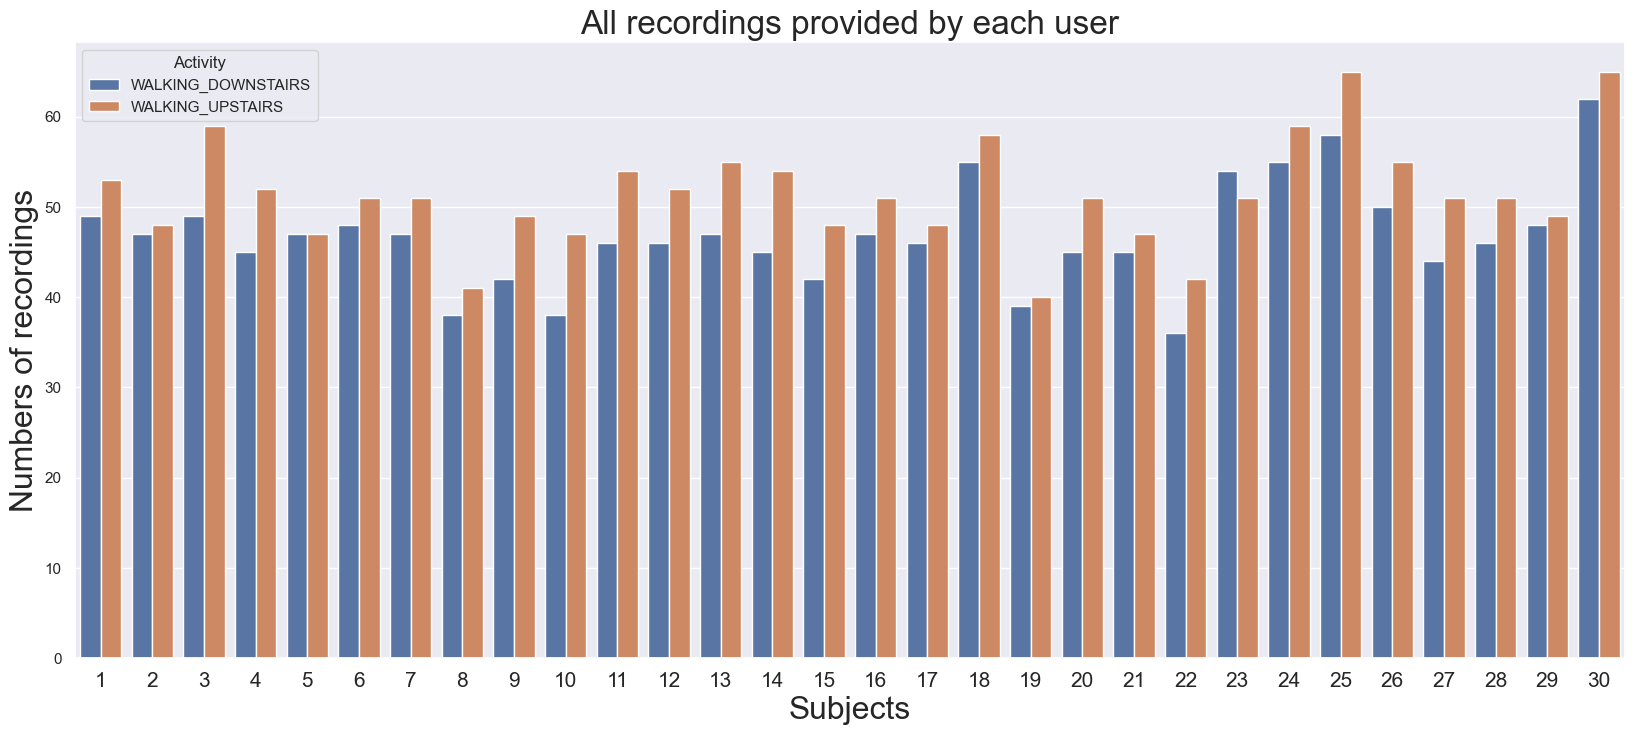

In [39]:
plt.figure(figsize=(20,8))
sns.color_palette("tab10")
plt.title('All recordings provided by each user', fontsize=24)
sns.countplot(x='subject',hue='Activity', data = full_data)
plt.xlabel("Subjects", size=23)
plt.ylabel("Numbers of recordings", size=23)
plt.xticks(size=15)
plt.show()

In [40]:
# Data type of the columns and no of nulls
print("No. of nulls: {}".format(full_data.isna().sum().sum()))

No. of nulls: 0


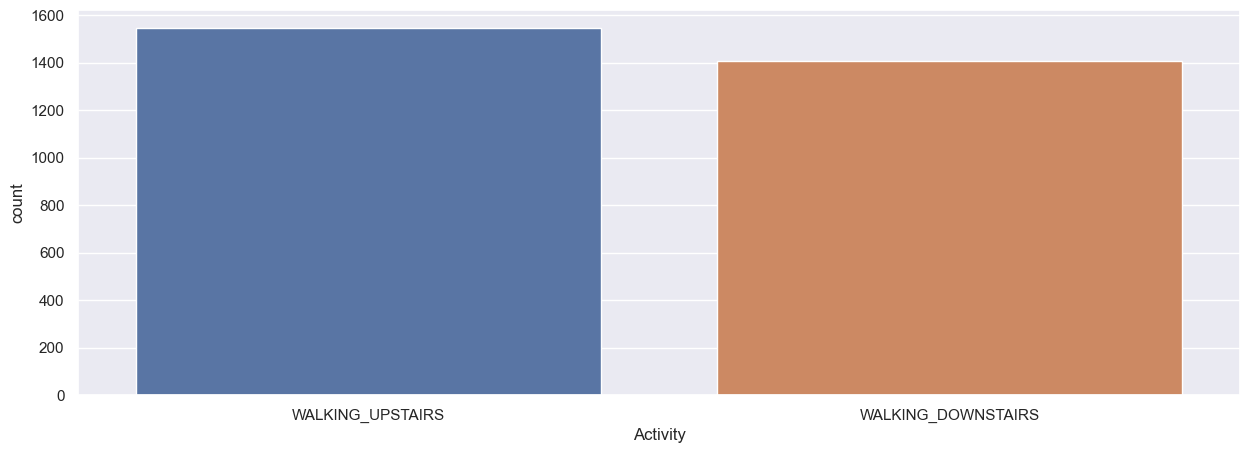

In [41]:
# Our main aim is to categorize an activity in to one of the six we have, 
# so let's take a look on how the label is distributed.
sns.set(style='darkgrid')
plt.figure(figsize=(15,5))
ax = sns.countplot(x='Activity', data=full_data, order=full_data['Activity'].value_counts().index)

In [42]:
# Create label
full_data_copy = full_data.copy()
label = full_data_copy.pop('Activity')

label

0       WALKING_DOWNSTAIRS
1       WALKING_DOWNSTAIRS
2       WALKING_DOWNSTAIRS
3       WALKING_DOWNSTAIRS
4       WALKING_DOWNSTAIRS
               ...        
2945      WALKING_UPSTAIRS
2946      WALKING_UPSTAIRS
2947      WALKING_UPSTAIRS
2948      WALKING_UPSTAIRS
2949      WALKING_UPSTAIRS
Name: Activity, Length: 2950, dtype: object

In [43]:
# Create datasets
tsne_data = full_data_copy.copy()
# tsne_data.pop('Data') to see & differentiate train or test data
tsne_data.pop('subject')
tsne_data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,tGravityAccMag-min(),tGravityAccMag-energy(),tGravityAccMag-iqr(),tBodyGyroMag-mean(),tBodyGyroMag-std(),tBodyGyroMag-mad(),tBodyGyroMag-max(),tBodyGyroMag-min(),tBodyGyroMag-energy(),tBodyGyroMag-iqr()
0,0.358455,0.017975,-0.084159,-0.171988,-0.188332,-0.399555,-0.218408,-0.246541,-0.363535,0.244225,...,-0.838651,-0.625680,-0.381499,-0.380149,-0.456242,-0.398768,-0.483569,-0.696083,-0.797199,-0.398153
1,0.301715,-0.007049,-0.093681,-0.040143,-0.141421,-0.325831,-0.079918,-0.182830,-0.281562,0.199676,...,-0.760780,-0.520178,-0.407414,-0.318154,-0.285041,-0.285140,-0.057503,-0.696083,-0.735171,-0.365666
2,0.281552,-0.016110,-0.140093,-0.094665,-0.007348,-0.347492,-0.151053,-0.142693,-0.315866,0.199676,...,-0.760780,-0.535671,-0.357024,-0.034723,-0.039304,0.074064,-0.057503,-0.511675,-0.484107,-0.013146
3,0.273956,-0.022899,-0.127256,-0.133382,0.132265,-0.336174,-0.211594,-0.051626,-0.318214,0.336350,...,-0.658212,-0.528973,-0.347359,-0.001721,-0.143908,-0.023150,-0.300822,-0.214151,-0.481035,-0.078737
4,0.299957,0.014082,-0.082310,0.069268,0.057800,-0.235050,-0.041806,-0.111045,-0.209609,0.531491,...,-0.590217,-0.380792,-0.235214,-0.207917,-0.390702,-0.320201,-0.427744,-0.506505,-0.684162,-0.379081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.726890,-0.655358,-0.573270,-0.393764,-0.478919,-0.432200,-0.512632,-0.532111,-0.807407,-0.473557
2946,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.726890,-0.627805,-0.569244,-0.303153,-0.476581,-0.399948,-0.512632,-0.234991,-0.756907,-0.382288
2947,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.681888,-0.663160,-0.582833,-0.288646,-0.530302,-0.465000,-0.546363,0.104303,-0.755103,-0.432986
2948,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.716092,-0.687499,-0.606064,-0.378952,-0.547232,-0.510961,-0.546363,-0.369289,-0.808251,-0.615376


In [44]:
# Scale data
scl = StandardScaler()
tsne_data = scl.fit_transform(tsne_data)

# Reduce dimensions (speed up)
pca = PCA(n_components=0.9, random_state=3)
tsne_data = pca.fit_transform(tsne_data)

# Transform data
tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(tsne_data)

/Users/anastasiapurtova/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/anastasiapurtova/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [45]:
codes = label.astype('category').cat.codes
n_classes = np.unique(codes).size
label_counts = label.value_counts()
label_counts
n_classes

2

In [46]:
kmeans = KMeans(n_clusters=n_classes, n_init=100, 
                random_state=17)
kmeans.fit(tsne_data)
cluster_labels = kmeans.labels_

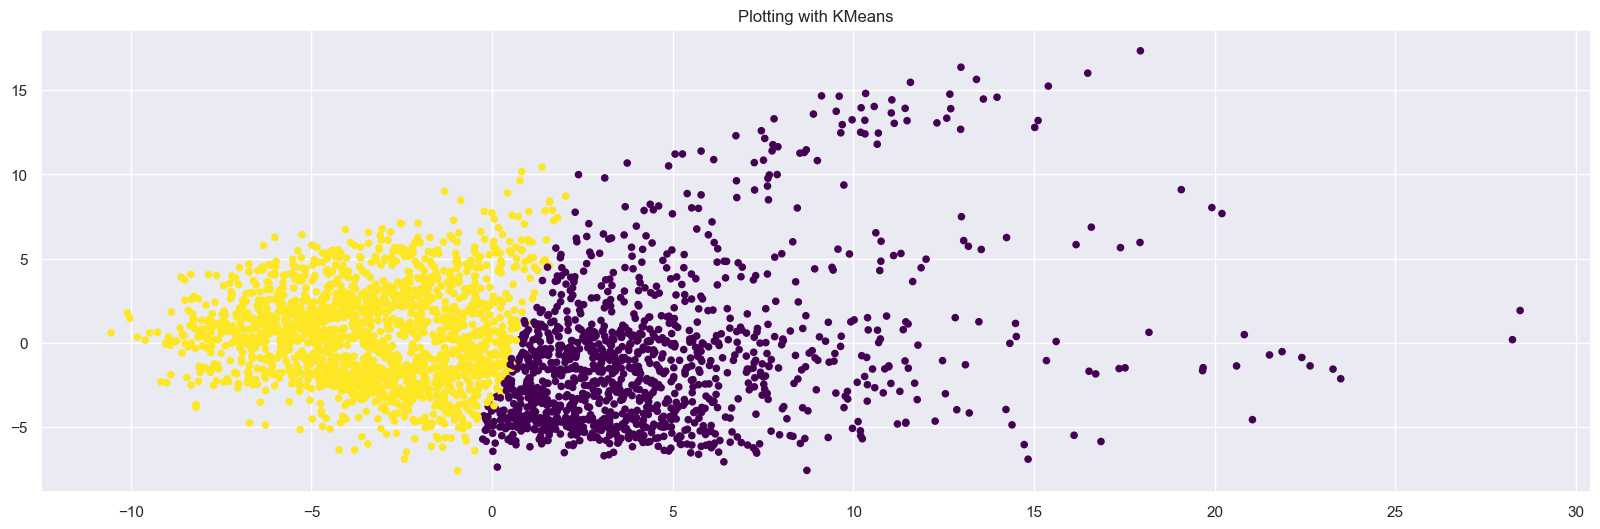

In [47]:
plt.figure(figsize=(20,6))
plt.title("Plotting with KMeans")
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=cluster_labels, s=20,  
            cmap='viridis')

In [48]:
tab = pd.crosstab(codes, cluster_labels, margins=True)
tab.index = [going up the stairs',
            'going down the stairs', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(2)] + ['all']
tab

SyntaxError: invalid syntax (3378648871.py, line 2)

In [49]:
# Transform data
tsne = TSNE(random_state=2)
tsne_transformed = tsne.fit_transform(tsne_data)

/Users/anastasiapurtova/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/anastasiapurtova/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


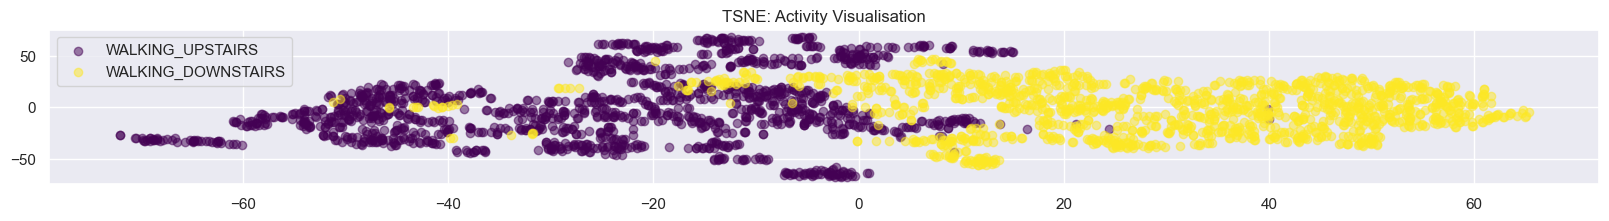

In [50]:
from matplotlib.cm import get_cmap
from matplotlib.colors import rgb2hex
plt.figure(figsize=(20,2))
n = label.unique().shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each activity
for i, group in enumerate(label_counts.index):
    # Mask to separate sets
    mask = (label==group).values
    plt.scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)
plt.title('TSNE: Activity Visualisation')
plt.legend()


In [51]:
full_data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,tGravityAccMag-iqr(),tBodyGyroMag-mean(),tBodyGyroMag-std(),tBodyGyroMag-mad(),tBodyGyroMag-max(),tBodyGyroMag-min(),tBodyGyroMag-energy(),tBodyGyroMag-iqr(),subject,Activity
0,0.358455,0.017975,-0.084159,-0.171988,-0.188332,-0.399555,-0.218408,-0.246541,-0.363535,0.244225,...,-0.381499,-0.380149,-0.456242,-0.398768,-0.483569,-0.696083,-0.797199,-0.398153,1,WALKING_DOWNSTAIRS
1,0.301715,-0.007049,-0.093681,-0.040143,-0.141421,-0.325831,-0.079918,-0.182830,-0.281562,0.199676,...,-0.407414,-0.318154,-0.285041,-0.285140,-0.057503,-0.696083,-0.735171,-0.365666,1,WALKING_DOWNSTAIRS
2,0.281552,-0.016110,-0.140093,-0.094665,-0.007348,-0.347492,-0.151053,-0.142693,-0.315866,0.199676,...,-0.357024,-0.034723,-0.039304,0.074064,-0.057503,-0.511675,-0.484107,-0.013146,1,WALKING_DOWNSTAIRS
3,0.273956,-0.022899,-0.127256,-0.133382,0.132265,-0.336174,-0.211594,-0.051626,-0.318214,0.336350,...,-0.347359,-0.001721,-0.143908,-0.023150,-0.300822,-0.214151,-0.481035,-0.078737,1,WALKING_DOWNSTAIRS
4,0.299957,0.014082,-0.082310,0.069268,0.057800,-0.235050,-0.041806,-0.111045,-0.209609,0.531491,...,-0.235214,-0.207917,-0.390702,-0.320201,-0.427744,-0.506505,-0.684162,-0.379081,1,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.573270,-0.393764,-0.478919,-0.432200,-0.512632,-0.532111,-0.807407,-0.473557,24,WALKING_UPSTAIRS
2946,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.569244,-0.303153,-0.476581,-0.399948,-0.512632,-0.234991,-0.756907,-0.382288,24,WALKING_UPSTAIRS
2947,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.582833,-0.288646,-0.530302,-0.465000,-0.546363,0.104303,-0.755103,-0.432986,24,WALKING_UPSTAIRS
2948,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.606064,-0.378952,-0.547232,-0.510961,-0.546363,-0.369289,-0.808251,-0.615376,24,WALKING_UPSTAIRS


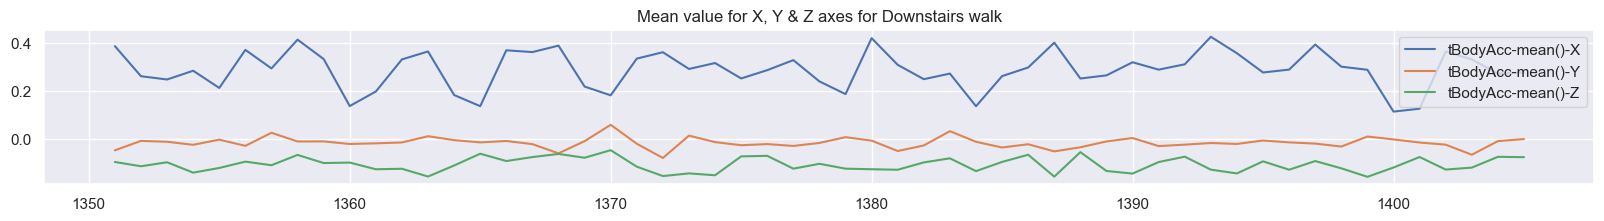

In [52]:
plt.figure(figsize=(20,2))
is_sub_24_DOWN = full_data_DOWN['subject'] == 24
X_full_DOWN = full_data_DOWN["tBodyAcc-mean()-X"]
Y_full_DOWN = full_data_DOWN["tBodyAcc-mean()-Y"]
Z_full_DOWN = full_data_DOWN["tBodyAcc-mean()-Z"]
X_DOWN = X_full_DOWN[is_sub_24_DOWN]
Y_DOWN = Y_full_DOWN[is_sub_24_DOWN]
Z_DOWN = Z_full_DOWN[is_sub_24_DOWN]

plt.plot(X_DOWN, label='tBodyAcc-mean()-X')
plt.plot(Y_DOWN, label='tBodyAcc-mean()-Y')
plt.plot(Z_DOWN, label='tBodyAcc-mean()-Z')

plt.title('Mean value for X, Y & Z axes for Downstairs walk')
plt.legend()
plt.show()

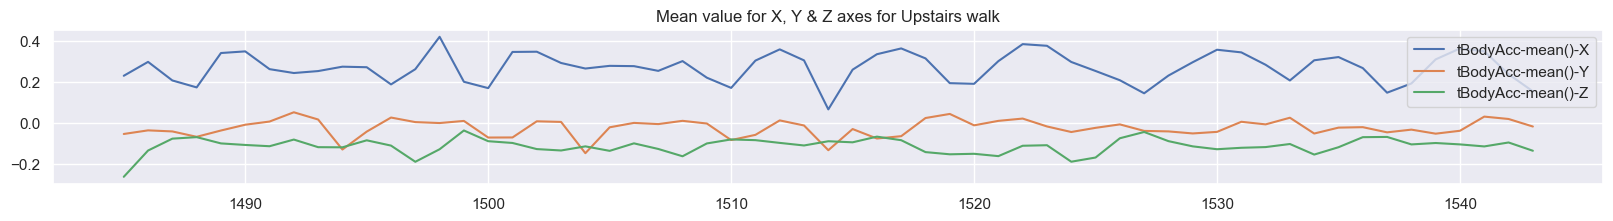

In [53]:
plt.figure(figsize=(20,2))
is_sub_24_UP = full_data_UP['subject'] == 24
X_full_UP = full_data_UP["tBodyAcc-mean()-X"]
Y_full_UP = full_data_UP["tBodyAcc-mean()-Y"]
Z_full_UP = full_data_UP["tBodyAcc-mean()-Z"]
X_UP = X_full_UP[is_sub_24_UP]
Y_UP = Y_full_UP[is_sub_24_UP]
Z_UP = Z_full_UP[is_sub_24_UP]

plt.plot(X_UP, label='tBodyAcc-mean()-X')
plt.plot(Y_UP, label='tBodyAcc-mean()-Y')
plt.plot(Z_UP, label='tBodyAcc-mean()-Z')

plt.title('Mean value for X, Y & Z axes for Upstairs walk')
plt.legend()
plt.show()

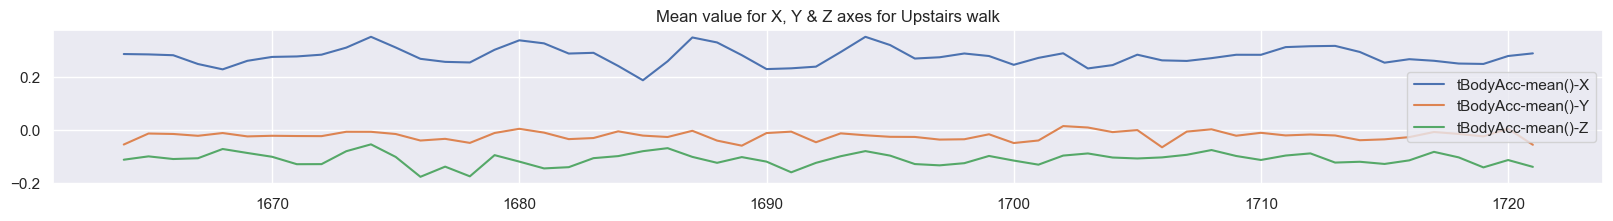

In [54]:
plt.figure(figsize=(20,2))
is_sub_24_WALKING = full_data_WALKING['subject'] == 24
X_full_WALKING = full_data_WALKING["tBodyAcc-mean()-X"]
Y_full_WALKING = full_data_WALKING["tBodyAcc-mean()-Y"]
Z_full_WALKING = full_data_WALKING["tBodyAcc-mean()-Z"]
X_WALKING = X_full_WALKING[is_sub_24_WALKING]
Y_WALKING = Y_full_WALKING[is_sub_24_WALKING]
Z_WALKING = Z_full_WALKING[is_sub_24_WALKING]

plt.plot(X_WALKING, label='tBodyAcc-mean()-X')
plt.plot(Y_WALKING, label='tBodyAcc-mean()-Y')
plt.plot(Z_WALKING, label='tBodyAcc-mean()-Z')

plt.title('Mean value for X, Y & Z axes for Upstairs walk')
plt.legend()
plt.show()

Training Accuracy DecisionTreeClassifier 100.0  Test Accuracy DecisionTreeClassifier 94.40677966101696
Training Precesion DecisionTreeClassifier 100.0  Test Precesion DecisionTreeClassifier 94.40677966101696
Training Recall DecisionTreeClassifier 100.0  Test Recall DecisionTreeClassifier 94.40677966101696


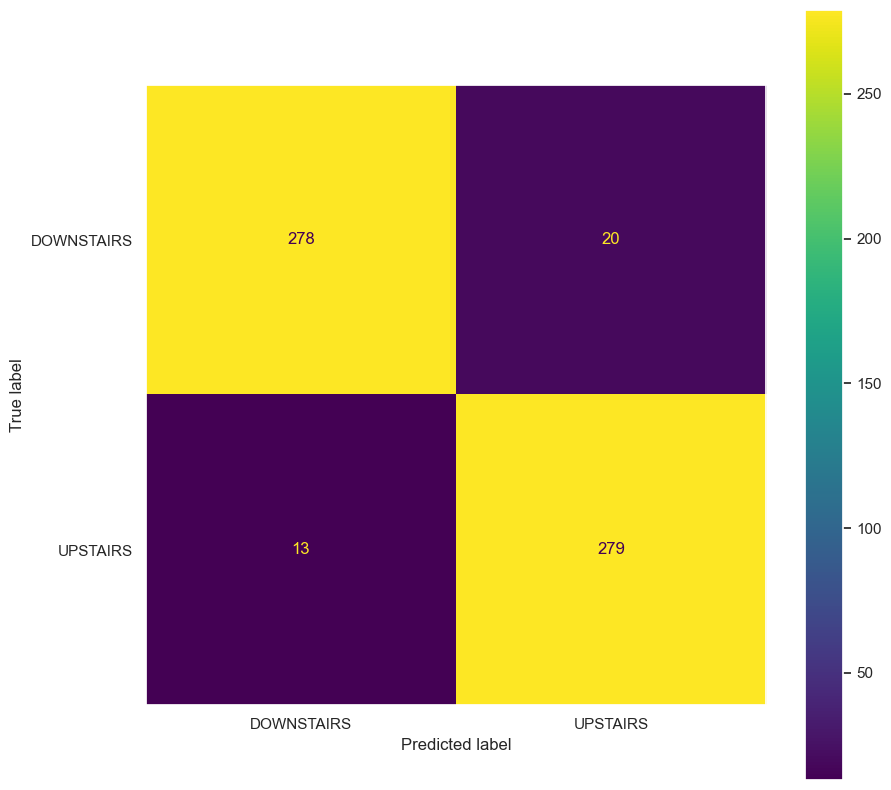

In [55]:
# Decision Tree
# https://www.kaggle.com/code/essammohamed4320/human-activity-recognition-scientific-prespective?scriptVersionId=107355415&cellId=41
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

X = full_data.drop(['subject', 'Activity'], axis=1)
y = full_data['Activity']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

kernal_evals = dict()

def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    
    train_precision = metrics.precision_score(y_train, model.predict(X_train), average='micro')
    test_precision = metrics.precision_score(y_test, model.predict(X_test), average='micro')
    
    train_recall = metrics.recall_score(y_train, model.predict(X_train), average='micro')
    test_recall = metrics.recall_score(y_test, model.predict(X_test), average='micro')
    
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))
    
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['DOWNSTAIRS',
       'UPSTAIRS'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)
    
tdt = DecisionTreeClassifier().fit(x_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)